![AML project 2](https://pbs.twimg.com/media/FSyiYYDWIAAjOE1?format=jpg&name=medium)

In [250]:
# import libraries|
import pandas as pd
import os
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from tqdm import tqdm
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

# Artificial Data

In [203]:
# import artificial data
X_train = pd.read_csv('artificial_train.data', header = None, sep = ' ')
y_train = pd.read_csv('artificial_train.labels', header = None, sep = ' ').to_numpy().reshape(-1)
X_validation = pd.read_csv('artificial_valid.data', header = None, sep = ' ')

In [204]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,NaN
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,NaN
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,NaN
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,NaN
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,NaN


In [205]:
X_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,NaN
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,NaN
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,NaN
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,NaN
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,NaN


In [206]:
# Drop last col of train and test due to present Nan Value
X_train = X_train.drop(columns=[500])
X_validation = X_validation.drop(columns=[500])

In [207]:
X_train.shape

(2000, 500)

# Feature Scaling

In [208]:
# feature scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [209]:
sc = StandardScaler()

In [210]:
X_train = sc.fit_transform(X_train)

In [211]:
X_validation = sc.transform(X_validation)

In [191]:
pd.DataFrame(X_validation)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.198982,-0.975935,0.072873,1.282399,0.516868,-1.509952,-0.668285,0.314280,1.277022,0.029350,...,-1.314759,0.296330,2.363950,-1.861747,-2.312519,0.243178,1.153314,1.083690,0.403681,0.764326
1,0.510501,0.813404,-0.441405,0.399166,-0.570639,-1.068402,0.588932,-0.408203,-0.518182,-0.527046,...,0.169573,0.296330,2.030080,0.293366,0.588920,-1.572577,0.983222,0.862393,1.075454,-0.513811
2,0.198982,1.244170,-0.081410,-0.925684,-0.208137,0.992162,-1.457127,-1.130686,0.612131,0.585746,...,0.408981,-0.700994,0.485928,-0.012268,0.416558,0.456796,1.323407,-1.350574,0.000618,0.493206
3,-1.202851,0.680860,1.692850,-0.373663,1.241872,0.550612,1.081959,1.036763,-0.252226,0.585746,...,1.845432,-0.950325,-0.682619,-0.263045,0.445285,0.376689,0.132757,-1.203043,1.182937,1.035446
4,2.068094,-0.313217,0.330012,-0.484067,-0.159803,1.286528,0.120557,-0.408203,0.678620,-0.109749,...,1.318734,-1.947650,1.487540,-1.203458,0.445285,0.243178,-0.547614,0.714862,-0.053124,0.028429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.756575,-0.843392,-0.184266,-0.594471,0.371867,-0.038120,-0.199910,1.036763,-2.845298,-0.248848,...,-0.644416,-0.950325,-0.056612,-0.419781,0.675102,-0.664700,-0.717707,0.419800,-0.053124,0.609401
596,-0.112536,0.018142,-0.749972,0.730379,-1.271476,0.256246,-0.323166,1.036763,-1.183073,0.585746,...,1.127207,1.542985,0.903266,0.802756,0.129286,0.430094,0.472943,0.493566,-1.423539,-1.520829
597,0.510501,0.051278,0.510010,-0.373663,-1.392310,1.139345,-0.446423,-1.130686,1.476489,2.115835,...,-1.937221,-1.199656,0.652863,-1.007539,-1.163434,-0.771509,-0.037335,-0.170325,-0.644283,1.035446
598,-0.735573,-0.478897,0.458582,0.178358,-0.449805,-1.509952,0.046603,0.314280,0.479153,-0.387947,...,-0.452889,-0.700994,-1.392095,1.108390,-0.646346,0.723819,-1.398078,0.493566,2.822062,0.067160


# Feature Selection Techniques

### Function to plot accuracies of selected classification algortihms

In [229]:
def plot_dic(dic, title=''):
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.plot(dic['no_fet'], dic['log_score'], color='green', label="Logistic regression")
    ax.plot(dic['no_fet'], dic['rfc_score'], color='blue', label="Random Forest")
    ax.plot(dic['no_fet'], dic['svc_score'], color='pink', label="SVC")
    ax.plot(dic['no_fet'], dic['lda_score'], color='red', label="LDA"),
    ax.plot(dic['no_fet'], dic['qda_score'], color='brown', label='QDA'),
    ax.plot(dic['no_fet'], dic['xgb_score'], color='orange', label='XGB')
    plt.title(title)
    ax.legend()

In [212]:
from sklearn.model_selection import train_test_split
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_train_, y_train, test_size=0.25, random_state=42)

## 1. ANOVA F-value
#### SelectKBest

In [27]:
from sklearn.feature_selection import f_classif, SelectKBest

100%|██████████| 39/39 [00:52<00:00,  1.36s/it]


Number of features to obtain biggest accuracy is equal to 7 for 0.854 % accuracy


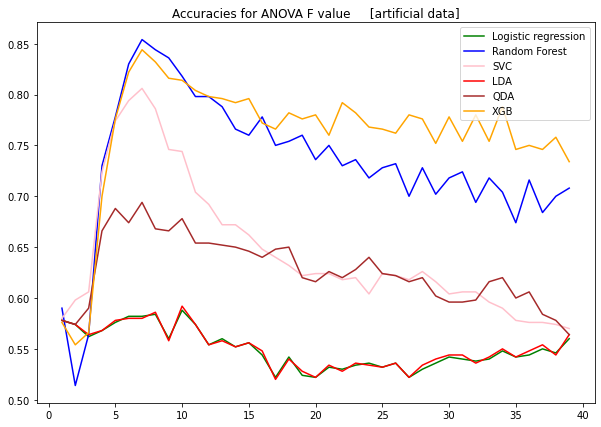

In [243]:
dic = {'rfc_score': [],
        'svc_score': [],
        'lda_score': [],
        'log_score': [],
        'no_fet': [],
        'qda_score': [],
        'xgb_score': []
        }

for i in tqdm(range(1, X_train.shape[1] - 460, 1)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectKBest(k=i)
    selected = selection.fit_transform(X_train_fin.copy(), y_train_fin)
    X_test_selected = selection.transform(X_test_fin)

    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic['no_fet'].append(i)

plot_dic(dic, title='Accuracies for ANOVA F value     [artificial data]')

no_fet = dic['no_fet'][np.array(dic['rfc_score']).argmax()]
print(f"Number of features to obtain biggest accuracy is equal to {no_fet} for {np.array(dic['rfc_score']).max()} % accuracy" )

In [141]:
rfc = RandomForestClassifier()
selection = SelectKBest(k=13)
selected = selection.fit_transform(X_train, y_train)
X_validation_selected = selection.transform(X_validation)

rfc.fit(selected, np.array(y_train).ravel())

proba = rfc.predict_proba(X_validation_selected)
np.savetxt('AMIR_artificial_data.txt', proba[:,1], fmt='%f')

In [177]:
features = selection.get_feature_names_out()
new_features = []

for i in features:
    new_features.append(i[1:])

new_features
np.savetxt('AMIR_artificial_features.txt', new_features, fmt='%s')

In [249]:
no_fet = dic['no_fet'][np.array(dic['rfc_score']).argmax()]
print(f"Number of features to obtain biggest accuracy is equal to {no_fet} for {np.array(dic['rfc_score']).max()} % accuracy" )

Number of features to obtain biggest accuracy is equal to 7 for 0.854 % accuracy


## FPR test
##### SelectFpr

In [213]:
from sklearn.feature_selection import SelectFpr

  0%|          | 0/40 [00:00<?, ?it/s]

(5,)


  2%|▎         | 1/40 [00:01<00:45,  1.16s/it]

(7,)


  5%|▌         | 2/40 [00:02<00:44,  1.17s/it]

(7,)


  8%|▊         | 3/40 [00:03<00:42,  1.15s/it]

(7,)


 10%|█         | 4/40 [00:04<00:41,  1.16s/it]

(7,)


 12%|█▎        | 5/40 [00:05<00:40,  1.16s/it]

(7,)


 15%|█▌        | 6/40 [00:07<00:42,  1.24s/it]

(7,)


 18%|█▊        | 7/40 [00:08<00:40,  1.22s/it]

(7,)


 20%|██        | 8/40 [00:09<00:37,  1.17s/it]

(7,)


 22%|██▎       | 9/40 [00:11<00:40,  1.31s/it]

(7,)


 25%|██▌       | 10/40 [00:12<00:40,  1.34s/it]

(7,)


 28%|██▊       | 11/40 [00:13<00:38,  1.33s/it]

(7,)


 30%|███       | 12/40 [00:15<00:37,  1.34s/it]

(7,)


 32%|███▎      | 13/40 [00:16<00:35,  1.33s/it]

(7,)


 35%|███▌      | 14/40 [00:17<00:34,  1.32s/it]

(7,)


 38%|███▊      | 15/40 [00:19<00:33,  1.32s/it]

(8,)


 40%|████      | 16/40 [00:20<00:31,  1.32s/it]

(8,)


 42%|████▎     | 17/40 [00:21<00:30,  1.31s/it]

(8,)


 45%|████▌     | 18/40 [00:22<00:28,  1.30s/it]

(8,)


 48%|████▊     | 19/40 [00:24<00:28,  1.34s/it]

(8,)


 50%|█████     | 20/40 [00:25<00:26,  1.33s/it]

(8,)


 52%|█████▎    | 21/40 [00:26<00:24,  1.31s/it]

(8,)


 55%|█████▌    | 22/40 [00:29<00:31,  1.73s/it]

(8,)


 57%|█████▊    | 23/40 [00:31<00:27,  1.64s/it]

(8,)


 60%|██████    | 24/40 [00:32<00:23,  1.48s/it]

(8,)


 62%|██████▎   | 25/40 [00:33<00:23,  1.54s/it]

(8,)


 65%|██████▌   | 26/40 [00:35<00:23,  1.69s/it]

(8,)


 68%|██████▊   | 27/40 [00:37<00:20,  1.56s/it]

(8,)


 70%|███████   | 28/40 [00:38<00:16,  1.39s/it]

(8,)


 72%|███████▎  | 29/40 [00:39<00:13,  1.26s/it]

(8,)


 75%|███████▌  | 30/40 [00:40<00:12,  1.22s/it]

(8,)


 78%|███████▊  | 31/40 [00:41<00:10,  1.18s/it]

(8,)


 80%|████████  | 32/40 [00:42<00:09,  1.13s/it]

(8,)


 82%|████████▎ | 33/40 [00:43<00:07,  1.07s/it]

(8,)


 85%|████████▌ | 34/40 [00:44<00:06,  1.03s/it]

(8,)


 88%|████████▊ | 35/40 [00:45<00:05,  1.00s/it]

(8,)


 90%|█████████ | 36/40 [00:46<00:04,  1.02s/it]

(8,)


 92%|█████████▎| 37/40 [00:47<00:03,  1.02s/it]

(8,)


 95%|█████████▌| 38/40 [00:48<00:01,  1.03it/s]

(8,)


 98%|█████████▊| 39/40 [00:48<00:00,  1.05it/s]

(8,)


100%|██████████| 40/40 [00:49<00:00,  1.25s/it]


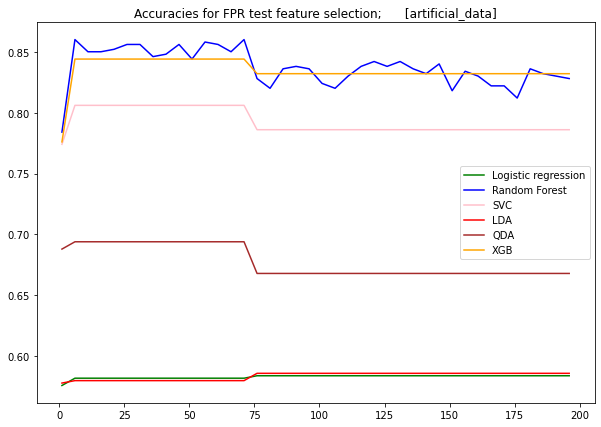

In [242]:
dic_fpr = {'rfc_score': [],
       'svc_score': [],
       'lda_score': [],
       'log_score': [],
       'no_fet': [],
       'qda_score': [],
       'xgb_score': []
       }

for i in tqdm(range(1, 200, 5)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectFpr(alpha=i/100000)
    selected = selection.fit_transform(X_train_fin, y_train_fin)
    selected_cols = selection.get_feature_names_out()
    X_test_selected = selection.transform(X_test_fin)

    print(selected_cols.shape)
    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic_fpr['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic_fpr['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic_fpr['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic_fpr['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic_fpr['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic_fpr['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic_fpr['no_fet'].append(i)

plot_dic(dic_fpr, title='Accuracies for FPR test feature selection;      [artificial_data]')

In [217]:
rfc = RandomForestClassifier()

selection = SelectFpr(alpha=11/100000)
selected = selection.fit_transform(X_train_fin, y_train_fin)
selected_cols = selection.get_feature_names_out()
X_validation_selected = selection.transform(X_validation_)

rfc.fit(selected, np.array(y_train_fin).ravel())

RandomForestClassifier()

In [220]:
features = selection.get_feature_names_out()
new_features = []

for i in features:
    new_features.append(i[1:])

np.savetxt('AMIR_artificial_features.txt', new_features, fmt='%s', header='"AMIR"')

proba = rfc.predict_proba(X_validation_selected)
np.savetxt('AMIR_artificial_data.txt', proba[:,1], fmt='%f', header='"AMIR"')

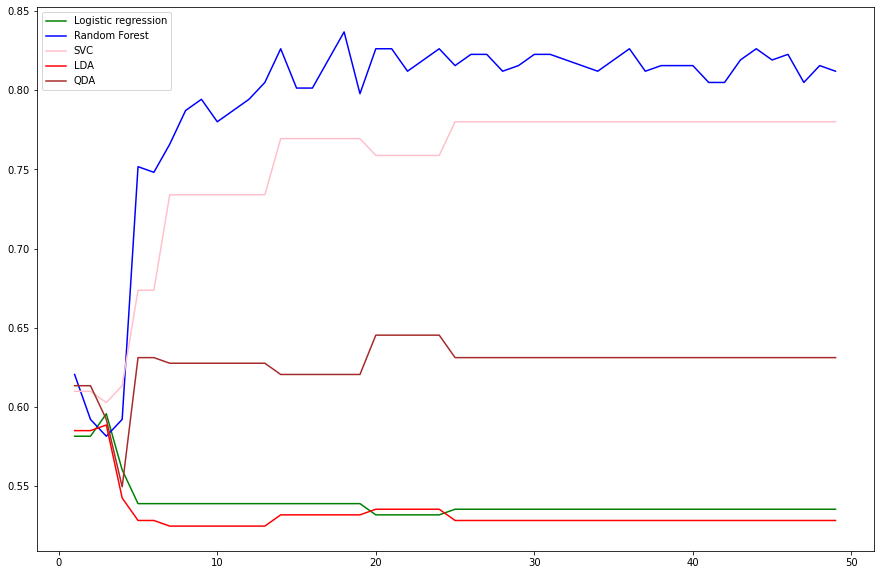

In [67]:
plot_dic(dic_fpr)
dic_fpr['no_fet'].append(i)
plot_dic(dic_fpr)

## Family-wise error rate
#### SelectFwe

In [178]:
from sklearn.feature_selection import SelectFwe

  0%|          | 0/8 [00:00<?, ?it/s]

(1500, 5)


 12%|█▎        | 1/8 [00:02<00:14,  2.04s/it]

(1500, 7)


 25%|██▌       | 2/8 [00:03<00:11,  1.86s/it]

(1500, 7)


 38%|███▊      | 3/8 [00:05<00:09,  1.81s/it]

(1500, 7)


 50%|█████     | 4/8 [00:07<00:06,  1.75s/it]

(1500, 7)


 62%|██████▎   | 5/8 [00:08<00:05,  1.74s/it]

(1500, 7)


 75%|███████▌  | 6/8 [00:10<00:03,  1.71s/it]

(1500, 7)


 88%|████████▊ | 7/8 [00:12<00:01,  1.65s/it]

(1500, 7)


100%|██████████| 8/8 [00:13<00:00,  1.72s/it]


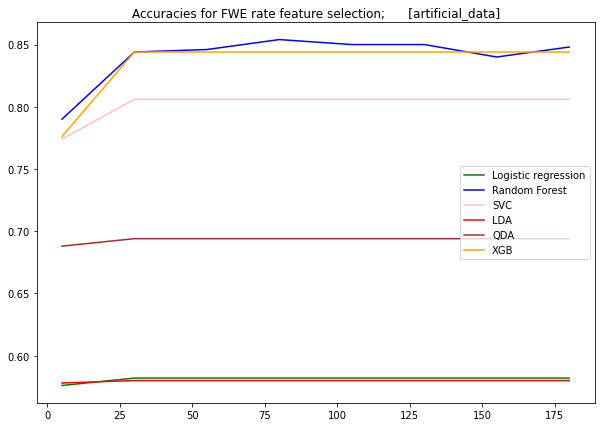

In [245]:
dic_fwe = {'rfc_score': [],
           'svc_score': [],
           'lda_score': [],
           'log_score': [],
           'no_fet': [],
           'qda_score': [],
           'xgb_score': []
           }

for i in tqdm(range(5, 200, 25)):
    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    selection = SelectFwe(f_classif, alpha=i/1000)
    selected_fwe = selection.fit_transform(X_train_fin, y_train_fin)
    X_test_selected_fwe = selection.transform(X_test_fin)
    print(selected_fwe.shape)

    rfc.fit(selected_fwe, np.array(y_train_fin).ravel())
    svc.fit(selected_fwe, np.array(y_train_fin).ravel())
    lda.fit(selected_fwe, np.array(y_train_fin).ravel())
    log.fit(selected_fwe, np.array(y_train_fin).ravel())
    qda.fit(selected_fwe, np.array(y_train_fin).ravel())
    xgb.fit(selected_fwe, np.array(y_xgb).ravel())

    dic_fwe['rfc_score'].append(rfc.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['svc_score'].append(svc.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['lda_score'].append(lda.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['log_score'].append(log.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['qda_score'].append(qda.score(X_test_selected_fwe, y_test_fin))
    dic_fwe['xgb_score'].append(xgb.score(X_test_selected_fwe, y_test_xgb))

    dic_fwe['no_fet'].append(i)

plot_dic(dic_fwe, title='Accuracies for FWE rate feature selection;      [artificial_data]')

## Selection from RandomForestClassifier
#### SelectFromModel

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
dic_fi = {'rfc_score': [],
       'svc_score': [],
       'lda_score': [],
       'log_score': [],
       'no_fet': [],
       'qda_score': [],
       'xgb_score': []
       }

for i in tqdm(range(1, 1000, 50)):

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    sel = SelectFromModel(RandomForestClassifier(n_estimators = i))
    sel.fit(X_train_fin, y_train_fin)

    selected_feat = X_train_fin.columns[(sel.get_support())]
    selected = X_train_fin.loc[:, selected_feat]
    X_test_selected = X_test_fin.loc[:, selected_feat]

    le = LabelEncoder()
    y_xgb = le.fit_transform(y_train_fin)
    y_test_xgb = le.fit_transform(y_test_fin)

    rfc.fit(selected, np.array(y_train_fin).ravel())
    svc.fit(selected, np.array(y_train_fin).ravel())
    lda.fit(selected, np.array(y_train_fin).ravel())
    log.fit(selected, np.array(y_train_fin).ravel())
    qda.fit(selected, np.array(y_train_fin).ravel())
    xgb.fit(selected, np.array(y_xgb).ravel())

    dic_fi['rfc_score'].append(rfc.score(X_test_selected, y_test_fin))
    dic_fi['svc_score'].append(svc.score(X_test_selected, y_test_fin))
    dic_fi['lda_score'].append(lda.score(X_test_selected, y_test_fin))
    dic_fi['log_score'].append(log.score(X_test_selected, y_test_fin))
    dic_fi['qda_score'].append(qda.score(X_test_selected, y_test_fin))
    dic_fi['xgb_score'].append(xgb.score(X_test_selected, y_test_xgb))

    dic_fi['no_fet'].append(i)

plot_dic(dic_fi)

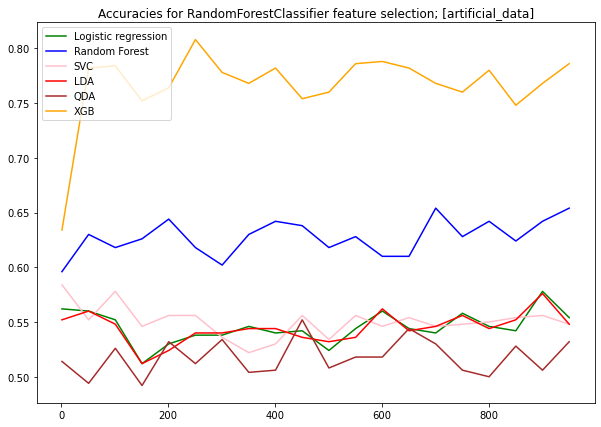

In [246]:
plot_dic(dic_fi, 'Accuracies for RandomForestClassifier feature selection; [artificial_data]')

## Kernel PCA

100%|██████████| 16/16 [01:29<00:00,  5.59s/it]


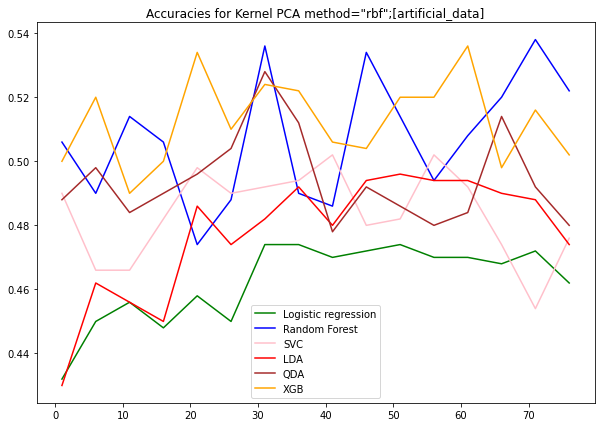

In [248]:
dic_kpca = {'rfc_score': [],
        'svc_score': [],
        'lda_score': [],
        'log_score': [],
       'qda_score': [],
       'xgb_score': [],
        'no_fet': []
        }

for i in tqdm(range(1, 80, 5)):
    kpca = KernelPCA(kernel="sigmoid", n_components=i)

    le = LabelEncoder()
    y_xgb_kpca = le.fit_transform(y_train_fin)
    y_test_xgb_kpca = le.fit_transform(y_test_fin)

    log = LogisticRegression()
    rfc = RandomForestClassifier()
    svc = SVC()
    qda = QuadraticDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis()
    xgb = XGBClassifier()

    X_train_kpca = kpca.fit_transform(X_train_fin)

    rfc.fit(X_train_kpca, np.array(y_train_fin).ravel())
    svc.fit(X_train_kpca, np.array(y_train_fin).ravel())
    lda.fit(X_train_kpca, np.array(y_train_fin).ravel())
    log.fit(X_train_kpca, np.array(y_train_fin).ravel())
    qda.fit(X_train_kpca, np.array(y_train_fin).ravel())
    xgb.fit(X_train_kpca, np.array(y_xgb_kpca).ravel())

    X_test_kpca = kpca.fit_transform(X_test_fin)

    dic_kpca['rfc_score'].append(rfc.score(X_test_kpca, y_test_fin))
    dic_kpca['svc_score'].append(svc.score(X_test_kpca, y_test_fin))
    dic_kpca['lda_score'].append(lda.score(X_test_kpca, y_test_fin))
    dic_kpca['log_score'].append(log.score(X_test_kpca, y_test_fin))
    dic_kpca['qda_score'].append(qda.score(X_test_kpca, y_test_fin))
    dic_kpca['xgb_score'].append(xgb.score(X_test_kpca, y_test_xgb_kpca))

    dic_kpca['no_fet'].append(i)

plot_dic(dic_kpca, 'Accuracies for Kernel PCA method="rbf";[artificial_data]')